In [17]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mtcnn import MTCNN
detector = MTCNN()
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]#fer


In [15]:
emotion_classifier = load_model("models\_XCEPTION.33-0.64.hdf5", compile=False)
emotion_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 24, 24, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 24, 24, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 24, 24, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

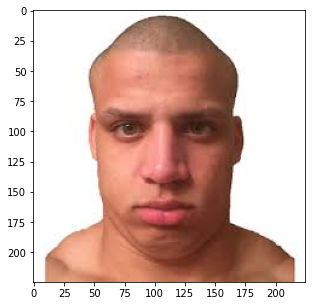

In [61]:
figure(figsize=(5, 5))
Image=cv2.imread('Images/t1.jpg')
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
plt.imshow(Image)

In [18]:
gray_fr = cv2.cvtColor(np.array(Image), cv2.COLOR_BGR2GRAY)
roi = cv2.resize(gray_fr, (48, 48))
roi = roi.astype("float") 
roi /= 127.5
roi -= 1.
roi = img_to_array(roi)
roi = np.expand_dims(roi, axis=0)
preds = emotion_classifier.predict(roi)[0]
emotion_probability = np.max(preds)
label = EMOTIONS[preds.argmax()]
print(label,emotion_probability)

Sad 0.5886548


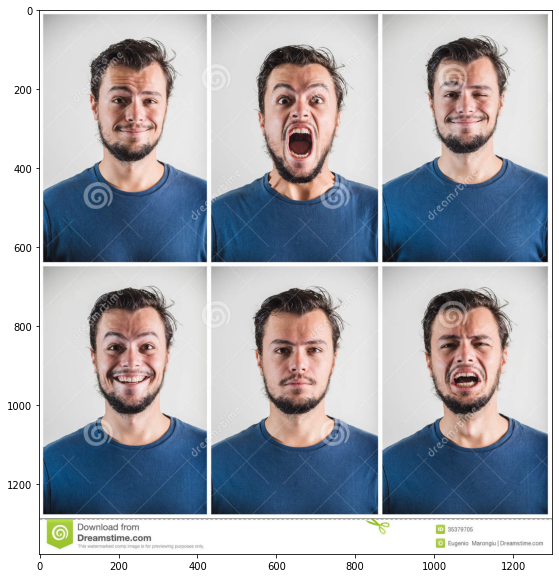

In [51]:
figure(figsize=(10, 10))
Image=cv2.imread('Images/test.jpg')
Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
plt.imshow(Image)

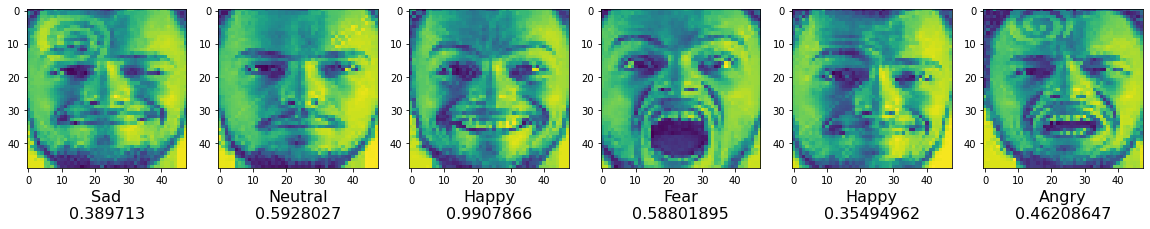

In [60]:

gray_fr=cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
faces = detector.detect_faces(Image)
fig,axes=plt.subplots(1,len(faces)-1,figsize=(20,10))
for face ,ax in zip(faces,axes):
    if face['confidence']>0.99:
        x,y,w,h=face['box']
        cropped_image = gray_fr[y:y+h, x:x+w]
        cropped_image=cv2.resize(cropped_image,(48,48))
        roi = cropped_image.astype("float") 
        roi /= 127.5
        roi -= 1.
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]
        ax.set_xlabel(label+'\n'+str(emotion_probability),fontsize=16)
        ax.imshow(cropped_image)
        
        